# Document AI | Fine-tune LayoutXLM on DocLayNet base in any language at line level (chunk of 384 tokens with overlap)

- Credit: 
  - notebook created from the notebook [Fine_tuning_LayoutXLM_on_XFUND_for_token_classification_using_HuggingFace_Trainer.ipynb](https://github.com/NielsRogge/Transformers-Tutorials/blob/master/LayoutXLM/Fine_tuning_LayoutXLM_on_XFUND_for_token_classification_using_HuggingFace_Trainer.ipynb)
  -  dataset from IBM Research ([DocLayNet](https://github.com/DS4SD/DocLayNet))
- Author of this notebook: [Pierre GUILLOU](https://www.linkedin.com/in/pierreguillou/)
- Date: 03/03/2023 
- Blog posts: 
  - (03/03/2023) [Document AI | Inference APP and fine-tuning notebook for Document Understanding at line level with LayoutXLM base]()
  - (02/16/2023) [Document AI | Inference APP and fine-tuning notebook for Document Understanding at paragraph level](https://medium.com/@pierre_guillou/document-ai-inference-app-and-fine-tuning-notebook-for-document-understanding-at-paragraph-level-c18d16e53cf8)
  - (02/14/2023) [Document AI | Inference APP for Document Understanding at line level](https://medium.com/@pierre_guillou/document-ai-inference-app-for-document-understanding-at-line-level-a35bbfa98893)
  - (02/10/2023) [Document AI | Document Understanding model at line level with LiLT, Tesseract and DocLayNet dataset](https://medium.com/@pierre_guillou/document-ai-document-understanding-model-at-line-level-with-lilt-tesseract-and-doclaynet-dataset-347107a643b8)
  - (01/31/2023) [Document AI | DocLayNet image viewer APP](https://medium.com/@pierre_guillou/document-ai-doclaynet-image-viewer-app-3ac54c19956)
  - (01/27/2023) [Document AI | Processing of DocLayNet dataset to be used by layout models of the Hugging Face hub (finetuning, inference)](https://medium.com/@pierre_guillou/document-ai-processing-of-doclaynet-dataset-to-be-used-by-layout-models-of-the-hugging-face-hub-308d8bd81cdb)
- Notebooks (paragraph level)
  - [Document AI | Inference APP at paragraph level with a Document Understanding model (LiLT fine-tuned on DocLayNet dataset)](https://github.com/piegu/language-models/blob/master/Gradio_inference_on_LiLT_model_finetuned_on_DocLayNet_base_in_any_language_at_levelparagraphs_ml512.ipynb)
  - [Document AI | Inference at paragraph level with a Document Understanding model (LiLT fine-tuned on DocLayNet dataset)](https://github.com/piegu/language-models/blob/master/inference_on_LiLT_model_finetuned_on_DocLayNet_base_in_any_language_at_levelparagraphs_ml512.ipynb)
  - [Document AI | Fine-tune LiLT on DocLayNet base in any language at paragraph level (chunk of 512 tokens with overlap)](https://github.com/piegu/language-models/blob/master/Fine_tune_LiLT_on_DocLayNet_base_in_any_language_at_paragraphlevel_ml_512.ipynb)
- Notebooks (line level)
  - [Document AI | Inference at line level with a Document Understanding model (LiLT fine-tuned on DocLayNet dataset)](https://github.com/piegu/language-models/blob/master/inference_on_LiLT_model_finetuned_on_DocLayNet_base_in_any_language_at_levellines_ml384.ipynb)
  - [Document AI | Inference APP at line level with a Document Understanding model (LiLT fine-tuned on DocLayNet dataset)](https://github.com/piegu/language-models/blob/master/Gradio_inference_on_LiLT_model_finetuned_on_DocLayNet_base_in_any_language_at_levellines_ml384.ipynb)
  - [Document AI | Fine-tune LiLT on DocLayNet base in any language at line level (chunk of 384 tokens with overlap)](https://github.com/piegu/language-models/blob/master/Fine_tune_LiLT_on_DocLayNet_base_in_any_language_at_linelevel_ml_384.ipynb)
  - [DocLayNet image viewer APP](https://github.com/piegu/language-models/blob/master/DocLayNet_image_viewer_APP.ipynb)
  - [Processing of DocLayNet dataset to be used by layout models of the Hugging Face hub (finetuning, inference)](processing_DocLayNet_dataset_to_be_used_by_layout_models_of_HF_hub.ipynb)

## Overview

### LayoutXLM

..... 

Sources:



### DocLayNet

#### DocLayNet dataset

[DocLayNet dataset](https://github.com/DS4SD/DocLayNet) (IBM) provides page-by-page layout segmentation ground-truth using bounding-boxes for 11 distinct class labels on 80863 unique pages from 6 document categories. 

Until today, the dataset can be downloaded through direct links or as a dataset from Hugging Face datasets:
- direct links: [doclaynet_core.zip](https://codait-cos-dax.s3.us.cloud-object-storage.appdomain.cloud/dax-doclaynet/1.0.0/DocLayNet_core.zip) (28 GiB), [doclaynet_extra.zip](https://codait-cos-dax.s3.us.cloud-object-storage.appdomain.cloud/dax-doclaynet/1.0.0/DocLayNet_extra.zip) (7.5 GiB)
- Hugging Face dataset library: [dataset DocLayNet](https://huggingface.co/datasets/ds4sd/DocLayNet)

Paper: [DocLayNet: A Large Human-Annotated Dataset for Document-Layout Analysis](https://arxiv.org/abs/2206.01062) (06/02/2022)

#### Processing into a format facilitating its use by HF notebooks

These 2 options require the downloading of all the data (approximately 30GBi), which requires downloading time (about 45 mn in Google Colab) and a large space on the hard disk. These could limit experimentation for people with low resources.

Moreover, even when using the download via HF datasets library, it is necessary to download the EXTRA zip separately ([doclaynet_extra.zip](https://codait-cos-dax.s3.us.cloud-object-storage.appdomain.cloud/dax-doclaynet/1.0.0/DocLayNet_extra.zip), 7.5 GiB) to associate the annotated bounding boxes with the text extracted by OCR from the PDFs. This operation also requires additional code because the boundings boxes of the texts do not necessarily correspond to those annotated (a calculation of the percentage of area in common between the boundings boxes annotated and those of the texts makes it possible to make a comparison between them).

At last, in order to use Hugging Face notebooks on fine-tuning layout models like LayoutLMv3 or LiLT, DocLayNet data must be processed in a proper format.

For all these reasons, I decided to process the DocLayNet dataset:
- into 3 datasets of different sizes:
  - [DocLayNet small](https://huggingface.co/datasets/pierreguillou/DocLayNet-small) (about 1% of DocLayNet) < 1.000k document images (691 train, 64 val, 49 test)
  - [DocLayNet base](https://huggingface.co/datasets/pierreguillou/DocLayNet-base) (about 10% of DocLayNet) < 10.000k document images (6910 train, 648 val, 499 test)
  - [DocLayNet large](https://huggingface.co/datasets/pierreguillou/DocLayNet-large) (about 100% of DocLayNet) < 100.000k document images (69.103 train, 6.480 val, 4.994 test)
- with associated texts and PDFs (base64 format),
- and in a format facilitating their use by HF notebooks.

*Note: the layout HF notebooks will greatly help participants of the IBM [ICDAR 2023 Competition on Robust Layout Segmentation in Corporate Documents](https://ds4sd.github.io/icdar23-doclaynet/)!*

#### About PDFs languages

Citation of the page 3 of the [DocLayNet paper](https://arxiv.org/abs/2206.01062): 
"We did not control the document selection with regard to language. **The vast majority of documents contained in DocLayNet (close to 95%) are published in English language.** However, **DocLayNet also contains a number of documents in other languages such as German (2.5%), French (1.0%) and Japanese (1.0%)**. While the document language has negligible impact on the performance of computer vision methods such as object detection and segmentation models, it might prove challenging for layout analysis methods which exploit textual features."

#### About PDFs categories distribution

Citation of the page 3 of the [DocLayNet paper](https://arxiv.org/abs/2206.01062): 
"The pages in DocLayNet can be grouped into **six distinct categories**, namely **Financial Reports, Manuals, Scientific Articles, Laws & Regulations, Patents and Government Tenders**. Each document category was sourced from various repositories. For example, Financial Reports contain both free-style format annual reports which expose company-specific, artistic layouts as well as the more formal SEC filings. The two largest categories (Financial Reports and Manuals) contain a large amount of free-style layouts in order to obtain maximum variability. In the other four categories, we boosted the variability by mixing documents from independent providers, such as different government websites or publishers. In Figure 2, we show the document categories contained in DocLayNet with their respective sizes."

![DocLayNet PDFs categories distribution (source: DocLayNet paper)](https://huggingface.co/datasets/pierreguillou/DocLayNet-base/resolve/main/DocLayNet_PDFs_categories_distribution.png)

#### DocLayNet Labels

The DocLayNet labels have the following meaning (source: [IBM DocLayNet Labeling Guide](https://raw.githubusercontent.com/DS4SD/DocLayNet/main/assets/DocLayNet_Labeling_Guide_Public.pdf))
- Text: Regular paragraphs.
- Picture: A graphic or photograph.
- Caption: Special text outside a picture or table that introduces this picture or table.
- Section-header: Any kind of heading in the text, except overall document title.
- Footnote: Typically small text at the bottom of a page, with a number or symbol that is referred to in the text above.
- Formula: Mathematical equation on its own line. 

Further labels not shown in the example above:
- Table: Material arranged in a grid alignment with rows and columns, often with separator lines.
- List-item: One element of a list, in a hanging shape, i.e., from the second line onwards the paragraph is indented more than the first line.
- Page-header: Repeating elements like page number at the top, outside of the normal text flow.
- Page-footer: Repeating elements like page number at the bottom, outside of the normal text flow.
- Title: 1 Overall title of a document, (almost) exclusively on the first page and
- typically appearing in large font.
- None: Initial state of each cell/element. Only keep this if the element is not a text or picture or anything else of value. For instance, a smear or an invisible/empty cell should remain “None

In [ ]:
!nvidia-smi

Wed Mar  1 21:55:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    32W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Set-up environment

In [1]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Libraries

In [2]:
!pip install -q transformers datasets sentencepiece evaluate seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 15.7 MB/s eta 0:00:00


In [3]:
!pip install -q torch==1.10.0+cu111 torchvision==0.11+cu111 -f https://download.pytorch.org/whl/torch_stable.html
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 GB 662.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 51.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.10.0+cu111 which is incompatible.
torchaudio 0.13.1+cu116 requires torch==1.13.1, but you have torch 1.10.0+cu111 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-d0ctu3x4
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-d0ctu3x4
  Resolved https://github.com/facebookresearch/detectron2.git to commit 80e2673da161f57afe37ef769836a61976108ef1
  Preparing metadata (setup

In [4]:
# # this will allow the notebook to reload/refresh automatically within the runtime
# %reload_ext autoreload
# %autoreload 2

In [5]:
import numpy as np
from operator import itemgetter
import collections
import pandas as pd

import random
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

font = ImageFont.load_default()

import cv2
# In Colab, use cv2_imshow instead of cv2.imshow
from google.colab.patches import cv2_imshow # Colab

from ipywidgets import widgets
from IPython.display import display, HTML

from datasets import  concatenate_datasets

### Key parameters

In [6]:
# categories colors
label2color = {
    'Caption': 'brown',
    'Footnote': 'orange',
    'Formula': 'gray',
    'List-item': 'yellow',
    'Page-footer': 'red',
    'Page-header': 'red',
    'Picture': 'violet',
    'Section-header': 'orange',
    'Table': 'green',
    'Text': 'blue',
    'Title': 'pink'
    }

domains = ["Financial Reports", "Manuals", "Scientific Articles", "Laws & Regulations", "Patents", "Government Tenders"]
domain_names = [domain_name.lower().replace(" ", "_").replace("&", "and") for domain_name in domains]

# bounding boxes start and end of a sequence
cls_box = [0, 0, 0, 0]
sep_box = [1000, 1000, 1000, 1000]

# DocLayNet dataset
# dataset_name = "pierreguillou/DocLayNet-small"
dataset_name = "pierreguillou/DocLayNet-base"
dataset_name_suffix = dataset_name.replace("pierreguillou/DocLayNet-", "")

# parameters for tokenization and overlap
max_length = 384 # The maximum length of a feature (sequence)
doc_stride = 128 # The authorized overlap between two part of the context when splitting it is needed.

# PAD token index
label_pad_token_id = -100

# parameters de TrainingArguments
batch_size=8 # WARNING: change this value according to your GPU RAM
num_train_epochs=3
learning_rate=2e-5
per_device_train_batch_size=batch_size
per_device_eval_batch_size=batch_size*2
gradient_accumulation_steps=1
warmup_ratio=0.1
evaluation_strategy="steps"
eval_steps=300
save_steps=300 # eval_steps
save_total_limit=1
load_best_model_at_end=True
metric_for_best_model="f1"
report_to="tensorboard"
fp16=True
push_to_hub=True # we'd like to push our model to the hub during training
hub_private_repo=True
hub_strategy="all_checkpoints"

# model name in HF
version = 1 # version number

output_dir = "DocLayNet/layout-xlm-base-finetuned-" + dataset_name.replace("pierreguillou/", "") + "_lines_ml" + str(max_length) + "-v" + str(version)
hub_model_id = "pierreguillou/layout-xlm-base-finetuned-" + dataset_name.replace("pierreguillou/", "") + "_lines_ml" + str(max_length) + "-v" + str(version)

### Functions

#### General

In [7]:
# it is important that each bounding box should be in (upper left, lower right) format.
# source: https://github.com/NielsRogge/Transformers-Tutorials/issues/129
def upperleft_to_lowerright(bbox):
    x0, y0, x1, y1 = tuple(bbox)
    if bbox[2] < bbox[0]:
        x0 = bbox[2]
        x1 = bbox[0] 
    if bbox[3] < bbox[1]:
        y0 = bbox[3]
        y1 = bbox[1] 
    return [x0, y0, x1, y1]
  
# convert boundings boxes (left, top, width, height) format to (left, top, left+widght, top+height) format. 
def convert_box(bbox):
    x, y, w, h = tuple(bbox) # the row comes in (left, top, width, height) format
    return [x, y, x+w, y+h] # we turn it into (left, top, left+widght, top+height) to get the actual box 

# LiLT model gets 1000x10000 pixels images
def normalize_box(bbox, width, height):
    return [
        int(1000 * (bbox[0] / width)),
        int(1000 * (bbox[1] / height)),
        int(1000 * (bbox[2] / width)),
        int(1000 * (bbox[3] / height)),
    ]

# LiLT model gets 1000x10000 pixels images
def denormalize_box(bbox, width, height):
    return [
        int(width * (bbox[0] / 1000)),
        int(height * (bbox[1] / 1000)),
        int(width* (bbox[2] / 1000)),
        int(height * (bbox[3] / 1000)),
    ]

# get back original size
def original_box(box, original_width, original_height, coco_width, coco_height):
    return [
        int(original_width * (box[0] / coco_width)),
        int(original_height * (box[1] / coco_height)),
        int(original_width * (box[2] / coco_width)),
        int(original_height* (box[3] / coco_height)),
    ]

def get_blocks(bboxes_block, categories, texts):

 # get list of unique block boxes
    bbox_block_dict, bboxes_block_list, bbox_block_prec = dict(), list(), list()
    for count_block, bbox_block in enumerate(bboxes_block):
        if bbox_block != bbox_block_prec:
            bbox_block_indexes = [i for i, bbox in enumerate(bboxes_block) if bbox == bbox_block]
            bbox_block_dict[count_block] = bbox_block_indexes
            bboxes_block_list.append(bbox_block)
        bbox_block_prec = bbox_block

    # get list of categories and texts by unique block boxes
    category_block_list, text_block_list = list(), list()
    for bbox_block in bboxes_block_list:
        count_block = bboxes_block.index(bbox_block)
        bbox_block_indexes = bbox_block_dict[count_block]
        category_block = np.array(categories, dtype=object)[bbox_block_indexes].tolist()[0]
        category_block_list.append(category_block)
        text_block = np.array(texts, dtype=object)[bbox_block_indexes].tolist()
        text_block = [text.replace("\n","").strip() for text in text_block]
        if id2label[category_block] == "Text" or id2label[category_block] == "Caption" or id2label[category_block] == "Footnote":
            text_block = ' '.join(text_block)
        else:
            text_block = '\n'.join(text_block)
        text_block_list.append(text_block)

    return bboxes_block_list, category_block_list, text_block_list

# function to sort bounding boxes
def get_sorted_boxes(bboxes):

    # sort by y from page top to bottom 
    sorted_bboxes = sorted(bboxes, key=itemgetter(1), reverse=False)
    y_list = [bbox[1] for bbox in sorted_bboxes]

    # sort by x from page left to right when boxes with same y
    if len(list(set(y_list))) != len(y_list):
        y_list_duplicates_indexes = dict()
        y_list_duplicates = [item for item, count in collections.Counter(y_list).items() if count > 1]
        for item in y_list_duplicates:
            y_list_duplicates_indexes[item] = [i for i, e in enumerate(y_list) if e == item]
            bbox_list_y_duplicates = sorted(np.array(sorted_bboxes, dtype=object)[y_list_duplicates_indexes[item]].tolist(), key=itemgetter(0), reverse=False)
            np_array_bboxes = np.array(sorted_bboxes)
            np_array_bboxes[y_list_duplicates_indexes[item]] = np.array(bbox_list_y_duplicates)
            sorted_bboxes = np_array_bboxes.tolist()

    return sorted_bboxes

# sort data from y = 0 to end of page (and after, x=0 to end of page when necessary)
def sort_data(bboxes, categories, texts):

    sorted_bboxes = get_sorted_boxes(bboxes)
    sorted_bboxes_indexes = [bboxes.index(bbox) for bbox in sorted_bboxes]
    sorted_categories = np.array(categories, dtype=object)[sorted_bboxes_indexes].tolist()
    sorted_texts = np.array(texts, dtype=object)[sorted_bboxes_indexes].tolist()

    return sorted_bboxes, sorted_categories, sorted_texts

#### Dataset

In [8]:
# get PDF image and its data
def generate_annotated_image(index_image=None, split="all"):

    # get dataset
    example = dataset

    # get split
    if split == "all":
        example = concatenate_datasets([example["train"], example["validation"], example["test"]])
    else:
        example = example[split]

    # get random image & PDF data
    if index_image == None: index_image = random.randint(0, len(example)-1)
    example = example[index_image]
    image = example["image"] # original image
    coco_width, coco_height = example["coco_width"], example["coco_height"]
    original_width, original_height = example["original_width"], example["original_height"]
    original_filename = example["original_filename"]
    page_no = example["page_no"]
    num_pages = example["num_pages"]

    # resize image to original
    image = image.resize((original_width, original_height))

    # get corresponding annotations
    texts = example["texts"]
    bboxes_block = example["bboxes_block"]
    bboxes_line = example["bboxes_line"]
    categories = example["categories"]
    domain = example["doc_category"]

    # get domain name
    index_domain = domain_names.index(domain)
    domain = domains[index_domain]

    # convert boxes to original
    original_bboxes_block = [original_box(convert_box(box), original_width, original_height, coco_width, coco_height) for box in bboxes_block]
    original_bboxes_line = [original_box(convert_box(box), original_width, original_height, coco_width, coco_height) for box in bboxes_line]

    ##### block boxes #####

    # get unique blocks and its data
    bboxes_blocks_list, category_block_list, text_block_list = get_blocks(original_bboxes_block, categories, texts)

    # sort data from y = 0 to end of page (and after, x=0 to end of page when necessary)
    sorted_original_bboxes_block_list, sorted_category_block_list, sorted_text_block_list = sort_data(bboxes_blocks_list, category_block_list, text_block_list)

    ##### line boxes ####

    # sort data from y = 0 to end of page (and after, x=0 to end of page when necessary)
    sorted_original_bboxes_line_list, sorted_category_line_list, sorted_text_line_list = sort_data(original_bboxes_line, categories, texts)

    # group paragraphs and lines outputs
    sorted_original_bboxes = [sorted_original_bboxes_block_list, sorted_original_bboxes_line_list]
    sorted_categories = [sorted_category_block_list, sorted_category_line_list]
    sorted_texts = [sorted_text_block_list, sorted_text_line_list]

    # get annotated boudings boxes on images
    images = [image.copy(), image.copy()]

    imgs, df_paragraphs, df_lines = dict(), pd.DataFrame(), pd.DataFrame()
    for i, img in enumerate(images):

        img = img.convert('RGB') # Convert to RGB
        draw = ImageDraw.Draw(img)
        
        for box, label_idx, text in zip(sorted_original_bboxes[i], sorted_categories[i], sorted_texts[i]):
            label = id2label[label_idx]
            color = label2color[label]
            draw.rectangle(box, outline=color)
            text = text.encode('latin-1', 'replace').decode('latin-1') # https://stackoverflow.com/questions/56761449/unicodeencodeerror-latin-1-codec-cant-encode-character-u2013-writing-to
            draw.text((box[0] + 10, box[1] - 10), text=label, fill=color, font=font)

        if i == 0: 
            imgs["paragraphs"] = img
        
            df_paragraphs["paragraphs"] = list(range(len(sorted_original_bboxes_block_list)))
            df_paragraphs["categories"] = [id2label[label_idx] for label_idx in sorted_category_block_list]
            df_paragraphs["texts"] = sorted_text_block_list
            df_paragraphs["bounding boxes"] = [str(bbox) for bbox in sorted_original_bboxes_block_list]

        else: 
            imgs["lines"] = img

            df_lines["lines"] = list(range(len(sorted_original_bboxes_line_list)))
            df_lines["categories"] = [id2label[label_idx] for label_idx in sorted_category_line_list]
            df_lines["texts"] = sorted_text_line_list
            df_lines["bounding boxes"] = [str(bbox) for bbox in sorted_original_bboxes_line_list]

    return imgs, original_filename, page_no, num_pages, domain, df_paragraphs, df_lines

In [9]:
# display PDF image and its data
def display_pdf_blocks_lines(index_image=None, split="all"):

    # get image and image data
    images, original_filename, page_no, num_pages, domain, df_paragraphs, df_lines = generate_annotated_image(index_image=index_image, split=split)

    print(f"PDF: {original_filename} (page: {page_no+1} / {num_pages}; domain: {domain})\n")

    # left widget
    style1 = {'overflow': 'scroll' ,'white-space': 'nowrap', 'width':'50%'}
    output1 = widgets.Output(description = "PDF image with bounding boxes of paragraphs", style=style1)
    with output1:
    
        # display image
        print(">> PDF image with bounding boxes of paragraphs\n")
        
        open_cv_image = np.array(images["paragraphs"]) # PIL to cv2
        # Convert RGB to BGR 
        open_cv_image = open_cv_image[:, :, ::-1].copy() 

        # cv2.imshow('',open_cv_image) # lambda
        cv2_imshow(open_cv_image) # Colab
        cv2.waitKey(0)

        # display DataFrame
        print("\n>> Paragraphs dataframe\n")
        display(df_paragraphs)

    # right widget
    style2 = style1
    output2 = widgets.Output(description = "PDF image with bounding boxes of lines", style=style2)
    with output2:
    
        # display image
        print(">> PDF image with bounding boxes of lines\n")
  
        open_cv_image = np.array(images["lines"]) # PIL to cv2
        # Convert RGB to BGR 
        open_cv_image = open_cv_image[:, :, ::-1].copy() 

        # cv2.imshow('',open_cv_image) # lambda
        cv2_imshow(open_cv_image) # Colab
        cv2.waitKey(0)

        # display DataFrame
        print("\n>> Lines dataframe\n")
        display(df_lines)

    ## Side by side thanks to HBox widgets
    sidebyside = widgets.HBox([output1,output2])
    ## Finally, show.
    display(sidebyside)

#### Encoded dataset

In [10]:
# creation of encoded dataset
def prepare_features_layoutxlm(example, cls_box = cls_box, sep_box = sep_box, label_pad_token_id = label_pad_token_id):

    input_ids_list, attention_mask_list, bb_list, ll_list, page_hash_list, original_image_list= list(), list(), list(), list(), list(), list()

    # get batch
    batch_page_hash = example["page_hash"] 
    batch_bboxes_line = example["bboxes_line"]
    batch_categories = example["categories"]
    batch_texts = example["texts"] 
    batch_images = example["image"] 
    batch_original_width, batch_original_height = example["original_width"] , example["original_height"] 
    batch_coco_width, batch_coco_height = example["coco_width"] , example["coco_height"] 

    # add a dimension if not a batch but only one image
    if not isinstance(batch_page_hash, list): 
        batch_page_hash = [batch_page_hash]
        batch_bboxes_line = [batch_bboxes_line]
        batch_categories = [batch_categories]
        batch_texts = [batch_texts]
        batch_images = [batch_images]
        batch_original_width, batch_original_height = [batch_original_width], [batch_original_height] 
        batch_coco_width, batch_coco_height = [batch_coco_width], [batch_coco_height] 
          
    # process all images of the batch
    for num_batch, (page_hash, boxes, labels, texts, image, coco_width, coco_height, original_width, original_height) in enumerate(zip(batch_page_hash, batch_bboxes_line, batch_categories, batch_texts, batch_images, batch_coco_width, batch_coco_height, batch_original_width, batch_original_height)):
        tokens_list = []
        bboxes_list = []
        labels_list = []

        # resize image to original + convert to RGB
        original_image = image.resize((original_width, original_height)).convert("RGB")

        # add a dimension if only on image
        if not isinstance(texts, list):
            texts, boxes, labels = [texts], [boxes], [labels]

        # convert boxes to original
        # Check the upperleft_to_lowerright
        # normalize
        normalize_bboxes_line = [normalize_box(upperleft_to_lowerright(convert_box(box)), coco_width, coco_height) for box in boxes]

        # sort boxes with categorizations and texts
        # we want sorted lists from top to bottom of the image
        boxes, labels, texts = sort_data(normalize_bboxes_line, labels, texts)

        count = 0
        for box, label, text in zip(boxes, labels, texts):
            tokens = tokenizer.tokenize(text)
            num_tokens = len(tokens) # get number of tokens
            tokens_list.extend(tokens)

            bboxes_list.extend([box] * num_tokens) # number of boxes must be the same as the number of tokens
            labels_list.extend([label if token.startswith('▁') else label_pad_token_id for token in tokens]) # WARNING: check the tokenizer to get the string to search
            # labels_list.extend([label] + ([label_pad_token_id] * (num_tokens - 1))) # number of labels id must be the same as the number of tokens

        # use of return_overflowing_tokens=True / stride=doc_stride
        # to get parts of image with overlap
        # source: https://huggingface.co/course/chapter6/3b?fw=tf#handling-long-contexts
        encodings = tokenizer(" ".join(texts), 
                            truncation=True,
                            padding="max_length", 
                            max_length=max_length, 
                            stride=doc_stride, 
                            return_overflowing_tokens=True, 
                            return_offsets_mapping=True
                            )

        _ = encodings.pop("overflow_to_sample_mapping")
        offset_mapping = encodings.pop("offset_mapping")

        # Let's label those examples and get their boxes   
        sequence_length_prev = 0   
        for i, offsets in enumerate(offset_mapping):
            # truncate tokens, boxes and labels based on length of chunk - 2 (special tokens <s> and </s>)
            sequence_length = len(encodings.input_ids[i]) - 2
            if i == 0: start = 0
            else: start += sequence_length_prev - doc_stride
            end = start + sequence_length
            sequence_length_prev = sequence_length

            # get tokens, boxes and labels of this image chunk
            bb = [cls_box] + bboxes_list[start:end] + [sep_box]
            # get labels for this chunck
            ll = [label_pad_token_id] + labels_list[start:end] + [label_pad_token_id]

            # # check if the start truncation is on label label_pad_token_id # WARNING: DO NOT NEED THAT
            # ll = labels_list[start:end]
            # flag = True
            # label_to_use = label_pad_token_id
            # count = 0
            # ll_ori = ll.copy()
            # while flag:
            #     if len(ll) > 0:
            #         if ll[0] != label_pad_token_id and count == 0:
            #             flag = False
            #         elif ll[0] == label_pad_token_id and count == 0:
            #             ll = ll[1:]
            #             count += 1
            #         elif ll[0] != label_pad_token_id and count > 0:
            #             label_to_use = ll[0]
            #             flag = False
            #         elif ll[0] == label_pad_token_id and count > 0:
            #             ll = ll[1:]
            #             count += 1
            #     else:
            #         flag = False

            # if label_to_use != label_pad_token_id:
            #     ll = [label_to_use]*count + ll_ori[count:]
            # else:
            #     ll = ll_ori

            # # check if the end truncation is on label label_pad_token_id
            # flag = True
            # count = 0
            # ll_ori = ll.copy()
            # while flag:
            #     if len(ll) > 0:
            #         if ll[-1] != label_pad_token_id and count == 0:
            #             flag = False
            #         elif ll[-1] == label_pad_token_id and count == 0:
            #             ll = ll[:-1]
            #             count += 1
            #         elif ll[-1] != label_pad_token_id and count > 0:
            #             label_to_use = ll[-1]
            #             flag = False
            #         elif ll[-1] == label_pad_token_id and count > 0:
            #             ll = ll[:-1]
            #             count += 1
            #     else:
            #         flag = False

            # if label_to_use != label_pad_token_id:
            #     ll = ll_ori[:-count] + [label_to_use]*count
            # else:
            #     ll = ll_ori

            # # get labels for this chunck
            # ll = [label_pad_token_id] + ll + [label_pad_token_id]

            # as the last chunk can have a length < max_length
            # we must to add [tokenizer.pad_token] (tokens), [sep_box] (boxes) and [label_pad_token_id] (labels)
            if len(bb) < max_length:
                bb = bb + [sep_box] * (max_length - len(bb))
                ll = ll + [label_pad_token_id] * (max_length - len(ll))

            # append results
            input_ids_list.append(encodings["input_ids"][i])
            attention_mask_list.append(encodings["attention_mask"][i])
            bb_list.append(bb)
            ll_list.append(ll)
            page_hash_list.append(page_hash)
            original_image_list.append(original_image)
        
    return {
      "input_ids": input_ids_list,
      "attention_mask": attention_mask_list,
      "normalized_bboxes": bb_list,
      "labels": ll_list,
      "page_hash": page_hash_list,
      "original_image": original_image_list,
      }

In [11]:
# get data of encoded chunk
def get_encoded_chunk(index_chunk=None, split="all"):

    # get datasets
    example = dataset
    encoded_example = encoded_dataset

    # get split
    if split == "all":
        example = concatenate_datasets([example["train"], example["validation"], example["test"]])
        encoded_example = concatenate_datasets([encoded_example["train"], encoded_example["validation"], encoded_example["test"]])
    else:
        example = example[split]
        encoded_example = encoded_example[split]

    # get randomly a document in dataset
    if index_chunk == None: index_chunk = random.randint(0, len(encoded_example)-1)
    encoded_example = encoded_example[index_chunk]
    encoded_page_hash = encoded_example["page_hash"]

    # get the image
    example = example.filter(lambda example: example["page_hash"] == encoded_page_hash)[0]
    image = example["image"] # original image
    coco_width, coco_height = example["coco_width"], example["coco_height"]
    # original_width, original_height = example["original_width"], example["original_height"]
    original_filename = example["original_filename"]
    page_no = example["page_no"]
    num_pages = example["num_pages"]
    domain = example["doc_category"]

    # get domain name
    index_domain = domain_names.index(domain)
    domain = domains[index_domain]

    # resize image to original
    # image = image.resize((original_width, original_height))

    # get boxes, texts, categories
    bboxes, labels_id, input_ids  = encoded_example["normalized_bboxes"][1:-1], encoded_example["labels"][1:-1], encoded_example["input_ids"][1:-1]
    bboxes = [denormalize_box(bbox, coco_width, coco_height) for bbox in bboxes]
    num_tokens = len(input_ids) + 2

    # get unique bboxes and corresponding labels
    bboxes_list, labels_list, input_ids_list = list(), list(), list()
    input_ids_dict = dict()
    bbox_prev = [-100, -100, -100, -100]
    for i, (bbox, label_id, input_id) in enumerate(zip(bboxes, labels_id, input_ids)):
        if bbox != bbox_prev:
            bboxes_list.append(bbox)
            input_ids_dict[str(bbox)] = [input_id]
            labels_list.append(label_id)
            label_id_prev = label_id
        else:
            input_ids_dict[str(bbox)].append(input_id)
    
        # start_indexes_list.append(i)
        bbox_prev = bbox
  
    # do not keep "</s><pad><pad>..."
    if input_ids_dict[str(bboxes_list[-1])][0] == (tokenizer.convert_tokens_to_ids('</s>')):
        del input_ids_dict[str(bboxes_list[-1])]
        bboxes_list = bboxes_list[:-1]
        labels_list = labels_list[:-1]

    # get texts by line
    input_ids_list = input_ids_dict.values()
    texts_list = [tokenizer.decode(input_ids) for input_ids in input_ids_list]
  
    # display DataFrame
    df = pd.DataFrame({"texts": texts_list, "input_ids": input_ids_list, "labels_ids": labels_list, "bboxes": bboxes_list})

    return image, original_filename, page_no, num_pages, domain, df, num_tokens

In [12]:
# display chunk of PDF image and its data
def display_chunk_lines(index_chunk=None, split="all"):

    # get image and image data
    image, original_filename, page_no, num_pages, domain, df, num_tokens = get_encoded_chunk(index_chunk=index_chunk, split=split)
    # image = image.convert('RGB') # Convert to RGB

    # get data from dataframe
    input_ids = df["input_ids"]
    texts = df["texts"]
    labels_ids = df["labels_ids"]
    bboxes = df["bboxes"]

    print(f'Chunk ({num_tokens} tokens) of the PDF "{original_filename}" (page: {page_no+1} / {num_pages}; domain: {domain})\n')

    # display image with annotated bounding boxes
    print(">> PDF image with bounding boxes of lines\n")
    draw = ImageDraw.Draw(image)
            
    labels = list()
    for box, label_idx, text in zip(bboxes, labels_ids, texts):
        if label_idx != label_pad_token_id:
            label = id2label[label_idx]
            labels.append(label)
            color = label2color[label]
            draw.rectangle(box, outline=color)
            text = text.encode('latin-1', 'replace').decode('latin-1') # https://stackoverflow.com/questions/56761449/unicodeencodeerror-latin-1-codec-cant-encode-character-u2013-writing-to
            draw.text((box[0] + 10, box[1] - 10), text=label, fill=color, font=font)

    open_cv_image = np.array(image) # PIL to cv2
    # Convert RGB to BGR 
    open_cv_image = open_cv_image[:, :, ::-1].copy() 

    # cv2.imshow('',open_cv_image) # lambda
    cv2_imshow(open_cv_image) # Colab
    cv2.waitKey(0)

    # display image dataframe
    print("\n>> Dataframe of annotated lines\n")
    df["labels"] = [id2label[label_idx] if label_idx != label_pad_token_id else "-100" for label_idx in labels_ids]
    cols = ["texts", "labels",	"bboxes"]
    df = df[cols]
    display(df)

## HF login

In [13]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid.
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as d

## Download DocLayNet

### Download

In [14]:
local_dataset_name = "/content/drive/MyDrive/DocLayNet/datasets/" + dataset_name.replace("pierreguillou/DocLayNet-", "")

In [15]:
from datasets import load_dataset
dataset = load_dataset(dataset_name)

# save locally
dataset.save_to_disk(local_dataset_name)

In [16]:
# load
from datasets import load_from_disk
dataset = load_from_disk(local_dataset_name)

In [17]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'texts', 'bboxes_block', 'bboxes_line', 'categories', 'image', 'page_hash', 'original_filename', 'page_no', 'num_pages', 'original_width', 'original_height', 'coco_width', 'coco_height', 'collection', 'doc_category'],
        num_rows: 6910
    })
    validation: Dataset({
        features: ['id', 'texts', 'bboxes_block', 'bboxes_line', 'categories', 'image', 'page_hash', 'original_filename', 'page_no', 'num_pages', 'original_width', 'original_height', 'coco_width', 'coco_height', 'collection', 'doc_category'],
        num_rows: 648
    })
    test: Dataset({
        features: ['id', 'texts', 'bboxes_block', 'bboxes_line', 'categories', 'image', 'page_hash', 'original_filename', 'page_no', 'num_pages', 'original_width', 'original_height', 'coco_width', 'coco_height', 'collection', 'doc_category'],
        num_rows: 499
    })
})

In [18]:
dataset["train"].features

{'id': Value(dtype='string', id=None),
 'texts': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'bboxes_block': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'bboxes_line': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'categories': Sequence(feature=ClassLabel(names=['Caption', 'Footnote', 'Formula', 'List-item', 'Page-footer', 'Page-header', 'Picture', 'Section-header', 'Table', 'Text', 'Title'], id=None), length=-1, id=None),
 'image': Image(decode=True, id=None),
 'page_hash': Value(dtype='string', id=None),
 'original_filename': Value(dtype='string', id=None),
 'page_no': Value(dtype='int32', id=None),
 'num_pages': Value(dtype='int32', id=None),
 'original_width': Value(dtype='int32', id=None),
 'original_height': Value(dtype='int32', id=None),
 'coco_width': Value(dtype='int32', id=None),
 'coco_height': Value(dtype='int32', id=None),

In [19]:
labels = dataset["train"].features["categories"].feature.names
id2label = {id:label for id, label in enumerate(labels)}
label2id = {label:id for id, label in enumerate(labels)}
num_labels = len(labels)
print(id2label)

{0: 'Caption', 1: 'Footnote', 2: 'Formula', 3: 'List-item', 4: 'Page-footer', 5: 'Page-header', 6: 'Picture', 7: 'Section-header', 8: 'Table', 9: 'Text', 10: 'Title'}


### Checking of the dataset

Select a dataset split and display a random annotated image from it and its dataframe.


In [20]:
# choose your dataset
splits = ["all", "train", "validation", "test"]

index_split = 3
split = splits[index_split]

# display random PDF image and its data
display_pdf_blocks_lines(split=split)

PDF: IBM-i-s5445349.pdf (page: 21 / 506; domain: Manuals)



## Create PyTorch Dataset

In [21]:
from transformers import AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained("microsoft/layoutxlm-base")
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")

### Encoded dataset (dataset divided into chunks with overlap)

Now one specific thing for the preprocessing in token classification is how to deal with very long documents. We usually truncate them in other tasks, when they are longer than the model maximum sentence length, but here, removing part of the the context might result in a worst model. To deal with this, we will allow one (long) example in our dataset to give several input features, each of length shorter than the maximum length of the model (or the one we set as a hyper-parameter). Also, we allow some overlap between the features we generate controlled by the hyper-parameter doc_stride in order to train the model with more contextual information.

Let's encode the dataset (ie, creation of chunks by page)!

In [22]:
local_encoded_dataset = "/content/drive/MyDrive/DocLayNet/datasets/xlmroberta/" + dataset_name.replace("pierreguillou/DocLayNet-", "") + "_lines_encoded" + "_ml" + str(max_length)
encoded_dataset_name_hub = dataset_name.replace("pierreguillou/","") + "_xlmroberta" + "_lines_encoded" + "_ml" + str(max_length)

In [23]:
# the first time, encode your data and save it locally and/or in the HF datasets hub
# for DocLayNet base, it can take about 40mn

encoded_dataset = dataset.map(prepare_features_layoutxlm, batched=True, batch_size=64, remove_columns=dataset["train"].column_names)

# save locally
encoded_dataset.save_to_disk(local_encoded_dataset)

# push to hub
encoded_dataset.push_to_hub(encoded_dataset_name_hub, private=True)

In [24]:
# # load from disk
# from datasets import load_from_disk
# encoded_dataset = load_from_disk(local_encoded_dataset)

# load from hb
from datasets import load_dataset
encoded_dataset = load_dataset("pierreguillou/" + encoded_dataset_name_hub)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating validation split:   0%|          | 0/2052 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/19249 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1362 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/pierreguillou___parquet/pierreguillou--DocLayNet-base_xlmroberta_lines_encoded_ml384-f5f292b37623ae0d/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [25]:
encoded_dataset

DatasetDict({
    validation: Dataset({
        features: ['page_hash', 'input_ids', 'attention_mask', 'normalized_bboxes', 'labels', 'original_image'],
        num_rows: 2052
    })
    train: Dataset({
        features: ['page_hash', 'input_ids', 'attention_mask', 'normalized_bboxes', 'labels', 'original_image'],
        num_rows: 19249
    })
    test: Dataset({
        features: ['page_hash', 'input_ids', 'attention_mask', 'normalized_bboxes', 'labels', 'original_image'],
        num_rows: 1362
    })
})

In [26]:
train_dataset = encoded_dataset["train"].remove_columns("page_hash").rename_column("normalized_bboxes", "bbox")
eval_dataset = encoded_dataset["validation"].remove_columns("page_hash").rename_column("normalized_bboxes", "bbox")
test_dataset = encoded_dataset["test"].remove_columns("page_hash").rename_column("normalized_bboxes", "bbox")

In [27]:
train_dataset.features

{'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'bbox': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'labels': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
 'original_image': Image(decode=True, id=None)}

In [28]:
from datasets import ClassLabel, Value, Sequence

new_features = train_dataset.features.copy()
new_features["input_ids"] = Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)
new_features["labels"] = Sequence(feature=ClassLabel(num_classes=11, names=labels, id=None), length=-1, id=None)
train_dataset = train_dataset.cast(new_features)

new_features = eval_dataset.features.copy()
new_features["input_ids"] = Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)
new_features["labels"] = Sequence(feature=ClassLabel(num_classes=11, names=labels, id=None), length=-1, id=None)
eval_dataset = eval_dataset.cast(new_features)

new_features = test_dataset.features.copy()
new_features["input_ids"] = Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)
new_features["labels"] = Sequence(feature=ClassLabel(num_classes=11, names=labels, id=None), length=-1, id=None)
test_dataset = test_dataset.cast(new_features)

import torch
train_dataset.set_format(type="torch", columns=['input_ids', 'attention_mask', 'bbox', 'labels', 'original_image'])
eval_dataset.set_format(type="torch", columns=['input_ids', 'attention_mask', 'bbox', 'labels', 'original_image'])
test_dataset.set_format(type="torch", columns=['input_ids', 'attention_mask', 'bbox', 'labels', 'original_image'])

Casting the dataset:   0%|          | 0/19249 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/2052 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/1362 [00:00<?, ? examples/s]

In [29]:
train_dataset.features

{'input_ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'bbox': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'labels': Sequence(feature=ClassLabel(names=['Caption', 'Footnote', 'Formula', 'List-item', 'Page-footer', 'Page-header', 'Picture', 'Section-header', 'Table', 'Text', 'Title'], id=None), length=-1, id=None),
 'original_image': Image(decode=True, id=None)}

###  Checking of the encoded dataset

Select a encoded dataset split and display a random annotated chunk image from it and its dataframe.

**Note**: the image is squared because of its normalization to 1000px vs 1000px in the encoded dataset (necessary for training the model).

Filter:   0%|          | 0/499 [00:00<?, ? examples/s]

Chunk (384 tokens) of the PDF "NYSE_HRL_2004.pdf" (page: 20 / 52; domain: Financial Reports)

>> PDF image with bounding boxes of lines



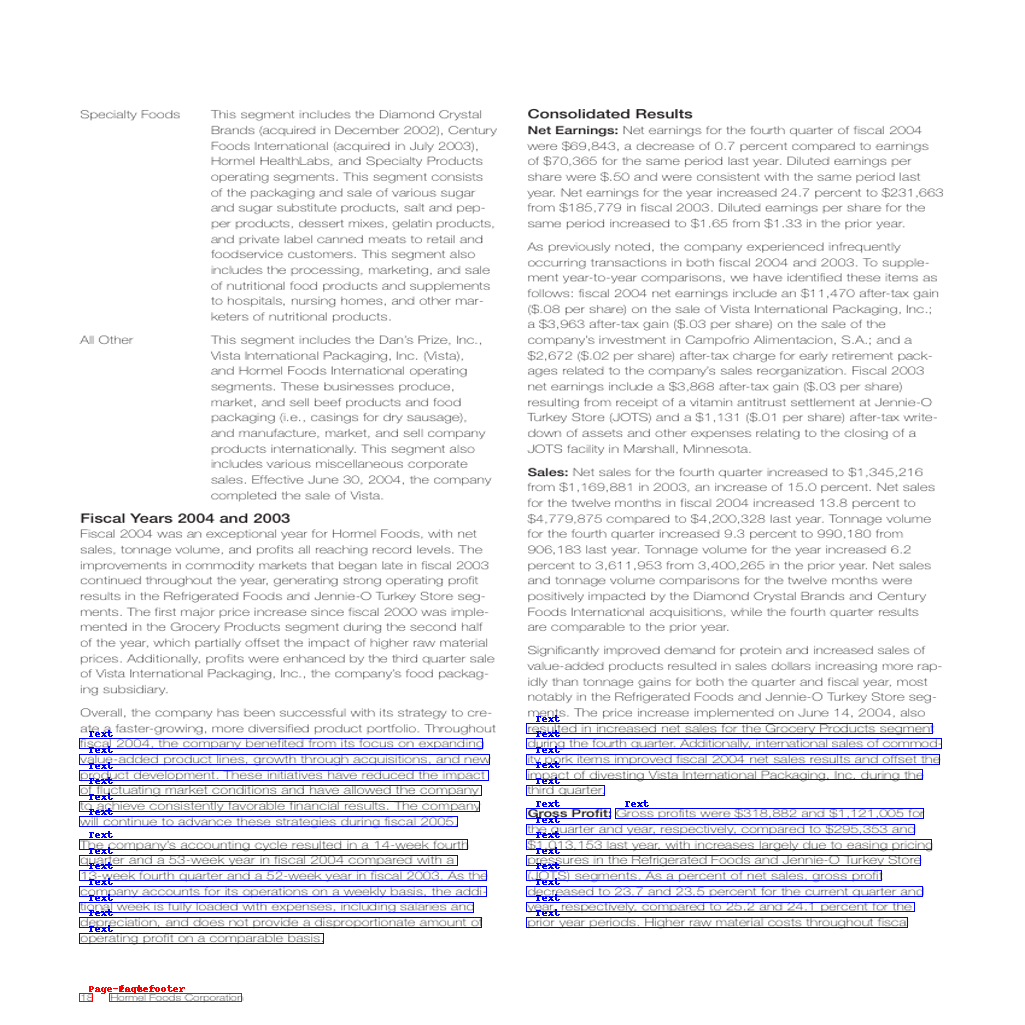


>> Dataframe of annotated lines



texts       labels  \
0              sales for the Grocery Products segment         Text   
1   fiscal 2004, the company benefited from its fo...         Text   
2   during the fourth quarter. Additionally, inter...         Text   
3   value-added product lines, growth through acqu...         Text   
4   ity pork items improved fiscal 2004 net sales ...         Text   
5   impact of divesting Vista International Packag...         Text   
6   product development. These initiatives have re...         Text   
7   of fluctuating market conditions and have allo...         Text   
8                                      third quarter.         Text   
9   to achieve consistently favorable financial re...         Text   
10                                      Gross Profit:         Text   
11     Gross profits were $318,882 and $1,121,005 for         Text   
12  will continue to advance these strategies duri...         Text   
13  the quarter and year, respectively, compared t...         Text   
14  The company’s accounting cycle resulted in a 1...         Text   
15  $1,013,153 last year, with increases largely d...         Text   
16  quarter and a 53-week year in fiscal 2004 comp...         Text   
17  pressures in the Refrigerated Foods and Jennie...         Text   
18  13-week fourth quarter and a 52-week year in f...         Text   
19  (JOTS) segments. As a percent of net sales, gr...         Text   
20  company accounts for its operations on a weekl...         Text   
21  decreased to 23.7 and 23.5 percent for the cur...         Text   
22  tional week is fully loaded with expenses, inc...         Text   
23  year, respectively, compared to 25.2 and 24.1 ...         Text   
24  depreciation, and does not provide a dispropor...         Text   
25  prior year periods. Higher raw material costs ...         Text   
26            operating profit on a comparable basis.         Text   
27                                                 18  Page-footer   
28                           Hormel Foods Corporation  Page-footer   

                   bboxes  
0    [526, 723, 932, 733]  
1     [79, 738, 482, 748]  
2    [526, 738, 941, 748]  
3     [79, 754, 489, 764]  
4    [526, 754, 939, 764]  
5    [526, 769, 922, 779]  
6     [79, 770, 488, 780]  
7     [79, 785, 481, 795]  
8    [526, 785, 604, 795]  
9     [79, 801, 479, 811]  
10   [526, 808, 610, 818]  
11   [615, 808, 923, 818]  
12    [79, 816, 457, 826]  
13   [526, 824, 914, 834]  
14    [79, 839, 467, 849]  
15   [526, 839, 931, 849]  
16    [79, 855, 457, 865]  
17   [526, 855, 920, 865]  
18    [79, 870, 486, 880]  
19   [526, 870, 881, 880]  
20    [79, 886, 486, 896]  
21   [526, 886, 922, 896]  
22    [79, 902, 473, 912]  
23   [526, 902, 914, 911]  
24    [79, 917, 481, 927]  
25   [526, 917, 907, 927]  
26    [79, 933, 323, 943]  
27    [79, 993, 92, 1001]  
28  [109, 993, 241, 1001]

In [30]:
# choose your split
splits = ["all", "train", "validation", "test"]

index_split = 3
split = splits[index_split]

# get and image from random chunk
display_chunk_lines(split=split)

### Create a custom dataset

In [31]:
# from torch.utils.data import Dataset

# class CustomDataset(Dataset):
#     def __init__(self, dataset, tokenizer):
#         self.dataset = dataset
#         self.tokenizer = tokenizer

#     def __len__(self):
#         return len(self.dataset)

#     def __getitem__(self, idx):
#         # get item
#         example = self.dataset[idx]
#         encoding = dict()
#         # encoding["page_hash"] = example["page_hash"]
#         encoding["input_ids"] = example["input_ids"]
#         encoding["attention_mask"] = example["attention_mask"]
#         encoding["bbox"] = example["normalized_bboxes"]
#         encoding["labels"] = example["labels"]
#         encoding["original_image"] = example["original_image"]
    
#         return encoding

In [32]:
# train_dataset = CustomDataset(train_dataset, tokenizer)
# eval_dataset = CustomDataset(eval_dataset, tokenizer)
# test_dataset = CustomDataset(test_dataset, tokenizer)

In [33]:
example = train_dataset[0]

for k,v in example.items():
    if k != "original_image":
        print(k,len(v), v.shape)

input_ids 384 torch.Size([384])
attention_mask 384 torch.Size([384])
bbox 384 torch.Size([384, 4])
labels 384 torch.Size([384])


In [34]:
example = train_dataset[0]

for k,v in example.items():
    if k != "original_image":
        print(k,v)

input_ids tensor([     0,  18622,      7,     47,     70,  51371,   3674,  53477,  63805,
             7,    111,     62,   3081,     19,    541,      5,    856,      5,
         18622,    836,  54697,    836, 131150,   1294,    111,   3622,  53477,
        181079,    136,  53477,    400,  27519,   2449,     99,  44075,  34292,
          8305,  18348,    707,  86669,    581,  23180,    450,  28960,      7,
         29334,  14096,     90,     70,  85358,    214,  41170,      7,    111,
         53477, 181079,    136,  53477,    400,  27519,   2449,    450,    621,
         18507,  47314,    237,     99,  44075,  34292,   8305,  18348,    707,
         86669,      4,    678,  95307, 149067,     19,  17721,   8382,  53477,
        181079,    136,  53477,    400,  27519,   2449,  34658,    100,  71702,
           136,   8382,    450,      4,  54799,  61475, 230466,      4,   3542,
          4331,  27686,    237,     99,  44075,  34292,   8305,  18348,    707,
         86669,      5,   1210

In [35]:
tokenizer.decode(example["input_ids"])

'<s> Notes to the consolidated financial statements of Aegon N.V. Note 50 270 50 Summary of total financial assets and financial liabilities at fair value through profit or loss The table that follows summarizes the carrying amounts of financial assets and financial liabilities that are classified as at fair value through profit or loss, with appropriate distinction between those financial assets and financial liabilities held for trading and those that, upon initial recognition, were designated as at fair value through profit or loss. 2013 2012 Trading Designated Trading Designated Investments for general account 121 4,712 754 4,809 Investments for account of policyholders - 164,037 - 151,960 Derivatives with positive values not designated as hedges 12,651 - 19,348 - Total financial assets at fair value through profit or loss 12,771 168,749 20,102 156,769 Investment contracts for account of policyholders - 32,628 - 29,188 Derivatives with negative values not designated as hedges 11,24

In [36]:
# for text, box, label in zip(dataset["train"][0]["texts"], dataset["train"][0]["bboxes_line"], dataset["train"][0]["categories"]):
#     print(text, box, id2label[label])

In [37]:
for id, box, label in zip(example["input_ids"], example["bbox"], example["labels"]):
    if label != label_pad_token_id:
        print(label)
        print(tokenizer.decode([id]), box, id2label[label.item()])
    else:
        print(tokenizer.decode([id]), box, label_pad_token_id)

<s> tensor([0, 0, 0, 0]) -100
tensor(5)
Note tensor([116,  29, 527,  41]) Page-header
s tensor([116,  29, 527,  41]) -100
tensor(5)
to tensor([116,  29, 527,  41]) Page-header
tensor(5)
the tensor([116,  29, 527,  41]) Page-header
tensor(5)
consolida tensor([116,  29, 527,  41]) Page-header
ted tensor([116,  29, 527,  41]) -100
tensor(5)
financial tensor([116,  29, 527,  41]) Page-header
tensor(5)
statement tensor([116,  29, 527,  41]) Page-header
s tensor([116,  29, 527,  41]) -100
tensor(5)
of tensor([116,  29, 527,  41]) Page-header
tensor(5)
A tensor([116,  29, 527,  41]) Page-header
ego tensor([116,  29, 527,  41]) -100
n tensor([116,  29, 527,  41]) -100
tensor(5)
N tensor([116,  29, 527,  41]) Page-header
. tensor([116,  29, 527,  41]) -100
V tensor([116,  29, 527,  41]) -100
. tensor([116,  29, 527,  41]) -100
tensor(5)
Note tensor([527,  29, 585,  42]) Page-header
tensor(5)
50 tensor([527,  29, 585,  42]) Page-header
tensor(5)
270 tensor([69, 30, 93, 42]) Page-header
tensor(7)

## Define Data Collator

Below, we define this data collator. For that, we'll use `LayoutLMv2FeatureExtractor` for preparing the image inputs, and `LayoutXLMTokenizer` to pad the text inputs.

In [38]:
from transformers import LayoutLMv2FeatureExtractor, LayoutXLMTokenizer

feature_extractor = LayoutLMv2FeatureExtractor(apply_ocr=False)
tokenizer = LayoutXLMTokenizer.from_pretrained("microsoft/layoutxlm-base")

/usr/local/lib/python3.8/dist-packages/transformers/models/layoutlmv2/feature_extraction_layoutlmv2.py:30: FutureWarning: The class LayoutLMv2FeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use LayoutLMv2ImageProcessor instead.
  warnings.warn(


In [39]:
from transformers import PreTrainedTokenizerBase
from transformers.file_utils import PaddingStrategy
from torch.utils.data import DataLoader
from dataclasses import dataclass
import torch

from typing import Optional, Union

@dataclass
class DataCollatorForTokenClassification:
    """
    Data collator that will dynamically pad the inputs received, as well as the labels.
    
    Args:
        tokenizer (:class:`~transformers.PreTrainedTokenizer` or :class:`~transformers.PreTrainedTokenizerFast`):
            The tokenizer used for encoding the data.
        padding (:obj:`bool`, :obj:`str` or :class:`~transformers.file_utils.PaddingStrategy`, `optional`, defaults to :obj:`True`):
            Select a strategy to pad the returned sequences (according to the model's padding side and padding index)
            among:
            * :obj:`True` or :obj:`'longest'`: Pad to the longest sequence in the batch (or no padding if only a single
              sequence if provided).
            * :obj:`'max_length'`: Pad to a maximum length specified with the argument :obj:`max_length` or to the
              maximum acceptable input length for the model if that argument is not provided.
            * :obj:`False` or :obj:`'do_not_pad'` (default): No padding (i.e., can output a batch with sequences of
              different lengths).
        max_length (:obj:`int`, `optional`):
            Maximum length of the returned list and optionally padding length (see above).
        pad_to_multiple_of (:obj:`int`, `optional`):
            If set will pad the sequence to a multiple of the provided value.
            This is especially useful to enable the use of Tensor Cores on NVIDIA hardware with compute capability >=
            7.5 (Volta).
        label_pad_token_id (:obj:`int`, `optional`, defaults to -100):
            The id to use when padding the labels (-100 will be automatically ignore by PyTorch loss functions).
    """

    feature_extractor: LayoutLMv2FeatureExtractor
    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None
    label_pad_token_id: int = -100

    def __call__(self, features):
        # prepare image input
        image = self.feature_extractor([feature["original_image"] for feature in features], return_tensors="pt").pixel_values

        # prepare text input
        for feature in features:
            del feature["original_image"]
        
        batch = self.tokenizer.pad(
            features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt"
        )

        batch["image"] = image
            
        return batch

data_collator = DataCollatorForTokenClassification(
    feature_extractor,
    tokenizer,
    pad_to_multiple_of=None,
    padding="max_length",
    max_length=max_length,
)

## Create PyTorch DataLoader (for verification of collate function)

Next, we could create PyTorch DataLoaders and train the model in native PyTorch. 

However, we'll use the HuggingFace Trainer in this notebook, as you can see further. We'll just need to provide our collate function defined above, and it will create dataloaders behind the scenes.

Below, we just create a PyTorch DataLoader to verify our collate function.

In [40]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=data_collator, shuffle=True)
eval_dataloader = DataLoader(eval_dataset, batch_size=batch_size, collate_fn=data_collator, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=data_collator, shuffle=True)

Let's verify a batch:

In [41]:
batch = next(iter(train_dataloader))
print(batch.keys())
print()

for k,v in batch.items():
  print(k, v.shape)

dict_keys(['input_ids', 'attention_mask', 'bbox', 'labels', 'image'])

input_ids torch.Size([8, 384])
attention_mask torch.Size([8, 384])
bbox torch.Size([8, 384, 4])
labels torch.Size([8, 384])
image torch.Size([8, 3, 224, 224])


In [42]:
tokenizer.decode(batch['input_ids'][0])

'<s> MetLife, Inc. Notes to the Consolidated Financial Statements — (Continued) Fixed Maturity and Equity Securities The majority of the Company’s fixed maturity and equity securities are classified as available-for-sale (“AFS”) and are reported at their estimated fair value. Unrealized investment gains and losses on these securities are recorded as a separate component of other comprehensive income (loss) (“OCI”), net of policyholder-related amounts and deferred income taxes. All security transactions are recorded on a trade date basis. Investment gains and losses on sales are determined on a specific identification basis. Interest income on fixed maturity securities is recognized when earned using an effective yield method giving effect to amortization of premiums and accretion of discounts. Prepayment fees are recognized when earned. Dividends on equity securities are recognized when declared. The Company periodically evaluates fixed maturity and equity securities for impairment. Th

In [43]:
for id, label in zip(batch['input_ids'][0][:30], batch['labels'][0][:30]):
  if label != -100:
    print(tokenizer.decode([id.item()]), id2label[label.item()])
  else:
    print(tokenizer.decode([id.item()]), label.item())

<s> -100
Met Section-header
Life -100
, -100
Inc Section-header
. -100
Note Section-header
s -100
to Section-header
the Section-header
Con Section-header
solid -100
ated -100
Financial Section-header
State Section-header
ments -100
— Section-header
( Section-header
Continu -100
ed -100
) -100
Fix Section-header
ed -100
Ma Section-header
tur -100
ity -100
and Section-header
Equi Section-header
ty -100
Se Section-header


It's always important to also verify that the resized image and normalized bounding boxes are set up properly.

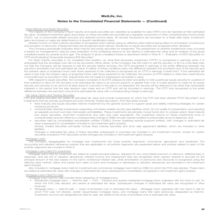

In [44]:
import numpy as np
from PIL import Image

image_to_verify = batch['image'][0].numpy()
image_to_verify = np.moveaxis(image_to_verify, source=0, destination=-1)
image_to_verify = Image.fromarray(image_to_verify)
image_to_verify

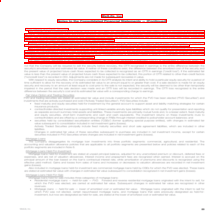

In [45]:
from PIL import ImageDraw

def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]

draw = ImageDraw.Draw(image_to_verify)
for bbox in batch['bbox'][0]:
    draw.rectangle(unnormalize_box(bbox, width=224, height=224), outline='red', width=1)

image_to_verify

## Define model

In [46]:
from transformers import LayoutLMv2ForTokenClassification

model = LayoutLMv2ForTokenClassification.from_pretrained('microsoft/layoutxlm-base',
                                                         id2label=id2label,
                                                         label2id=label2id)

Some weights of the model checkpoint at microsoft/layoutxlm-base were not used when initializing LayoutLMv2ForTokenClassification: ['layoutlmv2.visual.backbone.bottom_up.res4.0.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.4.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.20.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.3.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.1.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.15.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.17.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res5.1.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.7.conv1.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res3.0.conv1.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res2.0.conv2.norm.num_batches_tracked', 'layout

## Train the model using 🤗 Trainer

We first define a compute_metrics function as well as TrainingArguments.

In [47]:
from datasets import load_metric
import numpy as np

# Metrics
metric = load_metric("seqeval")
return_entity_level_metrics = False

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [id2label[p] for (p, l) in zip(prediction, label) if l != label_pad_token_id]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [id2label[l] for (p, l) in zip(prediction, label) if l != label_pad_token_id]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    if return_entity_level_metrics:
        # Unpack nested dictionaries
        final_results = {}
        for key, value in results.items():
            if isinstance(value, dict):
                for n, v in value.items():
                    final_results[f"{key}_{n}"] = v
            else:
                final_results[key] = value
        return final_results
    else:
        return {
            "precision": results["overall_precision"],
            "recall": results["overall_recall"],
            "f1": results["overall_f1"],
            "accuracy": results["overall_accuracy"],
        }

<ipython-input-47-602a686f53e2>:5: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("seqeval")


In [48]:
# # delete repo if exists
# try:
#     from huggingface_hub import HfApi
#     HfApi().delete_repo(hub_model_id)
# except:
#     print("Repository Not Found.")
# else:
#     print(f"The following repository was deleted: https://huggingface.co/{hub_model_id}")

In [49]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir=output_dir, # name of directory to store the checkpoints
    overwrite_output_dir=True,
    hub_model_id=hub_model_id, # name of directory to store the finetuned model in HF hub
    num_train_epochs=num_train_epochs,
    learning_rate=learning_rate,
    per_device_train_batch_size=per_device_train_batch_size,
    per_device_eval_batch_size=per_device_eval_batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    warmup_ratio=warmup_ratio, # we warmup a bit
    evaluation_strategy=evaluation_strategy,
    eval_steps=eval_steps,
    save_steps=save_steps, # eval_steps
    save_total_limit=save_total_limit,
    load_best_model_at_end=load_best_model_at_end,
    metric_for_best_model=metric_for_best_model,
    report_to=report_to,
    fp16=fp16,
    push_to_hub=push_to_hub, # we'd like to push our model to the hub during training
    hub_private_repo=hub_private_repo,
    hub_strategy=hub_strategy,
    remove_unused_columns=False,
    )

Next we define a custom Trainer which uses the DataLoaders we created above.

In [50]:
from transformers.data.data_collator import default_data_collator
from transformers import TrainingArguments, Trainer

class CustomTrainer(Trainer):
    def get_train_dataloader(self):
        return train_dataloader

    def get_eval_dataloader(self, eval_dataset = None):
        return eval_dataloader

# Initialize our Trainer
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

Cloning https://huggingface.co/pierreguillou/layout-xlm-base-finetuned-DocLayNet-base_lines_ml384-v1 into local empty directory.


Download file checkpoint-6300/optimizer.pt:   0%|          | 1.40k/2.73G [00:00<?, ?B/s]

Download file runs/Mar02_14-30-16_3eedd57194cc/events.out.tfevents.1677769428.3eedd57194cc.131.0: 100%|#######…

Clean file runs/Mar02_14-30-16_3eedd57194cc/events.out.tfevents.1677769428.3eedd57194cc.131.0:   8%|8         …

Download file checkpoint-6900/rng_state.pth: 100%|##########| 14.2k/14.2k [00:00<?, ?B/s]

Download file checkpoint-6300/sentencepiece.bpe.model:   0%|          | 8.00k/4.83M [00:00<?, ?B/s]

Clean file checkpoint-6900/rng_state.pth:   7%|7         | 1.00k/14.2k [00:00<?, ?B/s]

Download file checkpoint-6300/rng_state.pth: 100%|##########| 14.2k/14.2k [00:00<?, ?B/s]

Clean file checkpoint-6300/rng_state.pth:   7%|7         | 1.00k/14.2k [00:00<?, ?B/s]

Download file runs/Mar03_14-33-44_d1800a68524d/events.out.tfevents.1677856122.d1800a68524d.1185.0: 100%|######…

Clean file runs/Mar03_14-33-44_d1800a68524d/events.out.tfevents.1677856122.d1800a68524d.1185.0:  11%|#        …

Download file runs/Mar02_19-25-20_fe43f16895b4/events.out.tfevents.1677786852.fe43f16895b4.165.0: 100%|#######…

Clean file runs/Mar02_19-25-20_fe43f16895b4/events.out.tfevents.1677786852.fe43f16895b4.165.0:  13%|#3        …

Download file checkpoint-6900/optimizer.pt:   0%|          | 17.4k/2.73G [00:00<?, ?B/s]

Download file checkpoint-6900/pytorch_model.bin:   0%|          | 18.4k/1.38G [00:00<?, ?B/s]

Download file runs/Mar02_21-56-31_2c0f9ccb1a2a/events.out.tfevents.1677795998.2c0f9ccb1a2a.299.0: 100%|#######…

Clean file runs/Mar02_21-56-31_2c0f9ccb1a2a/events.out.tfevents.1677795998.2c0f9ccb1a2a.299.0:  14%|#4        …

Download file checkpoint-6300/pytorch_model.bin:   0%|          | 16.5k/1.38G [00:00<?, ?B/s]

Download file runs/Mar02_12-49-31_6f61ebd14765/events.out.tfevents.1677761390.6f61ebd14765.170.0: 100%|#######…

Clean file runs/Mar02_12-49-31_6f61ebd14765/events.out.tfevents.1677761390.6f61ebd14765.170.0:  13%|#2        …

Download file runs/Mar03_17-32-19_1db3e657f3ad/events.out.tfevents.1677866433.1db3e657f3ad.131.0: 100%|#######…

Clean file runs/Mar03_17-32-19_1db3e657f3ad/events.out.tfevents.1677866433.1db3e657f3ad.131.0:  14%|#4        …

Download file runs/Mar02_14-30-16_3eedd57194cc/1677769428.650405/events.out.tfevents.1677769428.3eedd57194cc.1…

Clean file runs/Mar02_14-30-16_3eedd57194cc/1677769428.650405/events.out.tfevents.1677769428.3eedd57194cc.131.…

Download file runs/Mar03_10-39-21_7e37b16db853/events.out.tfevents.1677841144.7e37b16db853.127.0: 100%|#######…

Clean file runs/Mar03_10-39-21_7e37b16db853/events.out.tfevents.1677841144.7e37b16db853.127.0:  14%|#4        …

Download file runs/Mar02_19-25-20_fe43f16895b4/1677786852.6119568/events.out.tfevents.1677786852.fe43f16895b4.…

Clean file runs/Mar02_19-25-20_fe43f16895b4/1677786852.6119568/events.out.tfevents.1677786852.fe43f16895b4.165…

Download file runs/Mar03_10-39-21_7e37b16db853/1677841145.0698338/events.out.tfevents.1677841145.7e37b16db853.…

Clean file runs/Mar03_10-39-21_7e37b16db853/1677841145.0698338/events.out.tfevents.1677841145.7e37b16db853.127…

Download file runs/Mar02_21-56-31_2c0f9ccb1a2a/1677795998.3346019/events.out.tfevents.1677795998.2c0f9ccb1a2a.…

Clean file runs/Mar02_21-56-31_2c0f9ccb1a2a/1677795998.3346019/events.out.tfevents.1677795998.2c0f9ccb1a2a.299…

Download file runs/Mar03_14-33-44_d1800a68524d/1677856122.2046905/events.out.tfevents.1677856122.d1800a68524d.…

Clean file runs/Mar03_14-33-44_d1800a68524d/1677856122.2046905/events.out.tfevents.1677856122.d1800a68524d.118…

Download file runs/Mar03_17-32-19_1db3e657f3ad/1677866433.1410654/events.out.tfevents.1677866433.1db3e657f3ad.…

Clean file runs/Mar03_17-32-19_1db3e657f3ad/1677866433.1410654/events.out.tfevents.1677866433.1db3e657f3ad.131…

Download file runs/Mar02_12-49-31_6f61ebd14765/1677761390.9870367/events.out.tfevents.1677761390.6f61ebd14765.…

Clean file runs/Mar02_12-49-31_6f61ebd14765/1677761390.9870367/events.out.tfevents.1677761390.6f61ebd14765.170…

Download file checkpoint-6300/training_args.bin: 100%|##########| 3.55k/3.55k [00:00<?, ?B/s]

Clean file checkpoint-6300/training_args.bin:  28%|##8       | 1.00k/3.55k [00:00<?, ?B/s]

Download file checkpoint-6900/training_args.bin: 100%|##########| 3.55k/3.55k [00:00<?, ?B/s]

Clean file checkpoint-6900/training_args.bin:  28%|##8       | 1.00k/3.55k [00:00<?, ?B/s]

Clean file training_args.bin:  28%|##8       | 1.00k/3.55k [00:00<?, ?B/s]

Clean file checkpoint-6300/sentencepiece.bpe.model:   0%|          | 1.00k/4.83M [00:00<?, ?B/s]

Download file checkpoint-6300/scheduler.pt: 100%|##########| 623/623 [00:00<?, ?B/s]

Download file checkpoint-6900/scheduler.pt: 100%|##########| 623/623 [00:00<?, ?B/s]

Download file checkpoint-6300/scaler.pt: 100%|##########| 559/559 [00:00<?, ?B/s]

Download file checkpoint-6900/scaler.pt: 100%|##########| 559/559 [00:00<?, ?B/s]

Clean file checkpoint-6900/sentencepiece.bpe.model:   0%|          | 1.00k/4.83M [00:00<?, ?B/s]

Clean file sentencepiece.bpe.model:   0%|          | 1.00k/4.83M [00:00<?, ?B/s]

Clean file checkpoint-6300/scheduler.pt: 100%|##########| 623/623 [00:00<?, ?B/s]

Clean file checkpoint-6900/scheduler.pt: 100%|##########| 623/623 [00:00<?, ?B/s]

Clean file checkpoint-6300/scaler.pt: 100%|##########| 559/559 [00:00<?, ?B/s]

Clean file checkpoint-6900/scaler.pt: 100%|##########| 559/559 [00:00<?, ?B/s]

Clean file checkpoint-6300/pytorch_model.bin:   0%|          | 1.00k/1.38G [00:00<?, ?B/s]

Clean file checkpoint-6900/pytorch_model.bin:   0%|          | 1.00k/1.38G [00:00<?, ?B/s]

Clean file pytorch_model.bin:   0%|          | 1.00k/1.38G [00:00<?, ?B/s]

Clean file checkpoint-6300/optimizer.pt:   0%|          | 1.00k/2.73G [00:00<?, ?B/s]

Clean file checkpoint-6900/optimizer.pt:   0%|          | 1.00k/2.73G [00:00<?, ?B/s]

Using cuda_amp half precision backend


In [ ]:
trainer.train()

In [ ]:
# If occured an erro, train again from a checkpoint
# trainer.train(resume_from_checkpoint="/content/DocLayNet/layout-xlm-base-finetuned-DocLayNet-base_lines_ml384-v1/checkpoint-xxxx")

### Evaluate

In [ ]:
trainer.evaluate()

```
***** Running Evaluation *****
  Num examples = 2052
  Batch size = 16
{'eval_loss': 0.23635472357273102,
 'eval_precision': 0.7259643398205338,
 'eval_recall': 0.7414747366541689,
 'eval_f1': 0.7336375680847931,
 'eval_accuracy': 0.9373375342495366,
 'eval_runtime': 477.0588,
 'eval_samples_per_second': 4.301,
 'eval_steps_per_second': 0.27,
 'epoch': 3.0}
 ```

## Push to HF

In [53]:
trainer.push_to_hub()

Saving model checkpoint to DocLayNet/layout-xlm-base-finetuned-DocLayNet-base_lines_ml384-v1
Configuration saved in DocLayNet/layout-xlm-base-finetuned-DocLayNet-base_lines_ml384-v1/config.json
Model weights saved in DocLayNet/layout-xlm-base-finetuned-DocLayNet-base_lines_ml384-v1/pytorch_model.bin
tokenizer config file saved in DocLayNet/layout-xlm-base-finetuned-DocLayNet-base_lines_ml384-v1/tokenizer_config.json
Special tokens file saved in DocLayNet/layout-xlm-base-finetuned-DocLayNet-base_lines_ml384-v1/special_tokens_map.json


Upload file runs/Mar03_19-41-45_20731f597183/events.out.tfevents.1677874488.20731f597183.2210.0: 100%|########…

Upload file runs/Mar03_19-41-45_20731f597183/events.out.tfevents.1677878641.20731f597183.2210.2: 100%|########…

To https://huggingface.co/pierreguillou/layout-xlm-base-finetuned-DocLayNet-base_lines_ml384-v1
   3668456..45c3ac9  main -> main

   3668456..45c3ac9  main -> main

Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Token Classification', 'type': 'token-classification'}, 'metrics': [{'name': 'Precision', 'type': 'precision', 'value': 0.7259643398205338}, {'name': 'Recall', 'type': 'recall', 'value': 0.7414747366541689}, {'name': 'F1', 'type': 'f1', 'value': 0.7336375680847931}, {'name': 'Accuracy', 'type': 'accuracy', 'value': 0.9373375342495366}]}
To https://huggingface.co/pierreguillou/layout-xlm-base-finetuned-DocLayNet-base_lines_ml384-v1
   45c3ac9..9e9d27b  main -> main

   45c3ac9..9e9d27b  main -> main



'https://huggingface.co/pierreguillou/layout-xlm-base-finetuned-DocLayNet-base_lines_ml384-v1/commit/45c3ac9a571187f762b2aaea7e3b6160d8bfa04f'

# END